In [12]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Modelling
from sklearn.tree import DecisionTreeRegressor

# Metrics 
from sklearn.metrics import mean_squared_error


In [177]:
# Dataset
test = pd.DataFrame({'x':[0,1,2,2,3,5,6,7,3,4,4], 'x2':[5,10,15,20,25,30,35,40, 13, 20,30], 
                     'y':[10,20,30,35,40, 60,80,70, 10, 33, 32]})

In [190]:
test

,x,x2,y
0,0,5,10
1,1,10,20
2,2,15,30
3,2,20,35
4,3,25,40
5,5,30,60
6,6,35,80
7,7,40,70
8,3,13,10
9,4,20,33


In [194]:
test[test.y.index.isin([3,4,5])].y

3    35
4    40
5    60
Name: y, dtype: int64

### The Regression Tree

In [225]:
# This tree was set to not have cols > 5, it's implementation isn't 100% yet

def decision_tree(X_train, y, max_depth = 20, max_column = 5):
    '''Finds the spliting threshold for the root of the tree'''
    
    # Initializing 
    mse = []
    min_thresholds = []
    feats = []
    min_error = []
    target_var_name = y.columns.values[0]
    
    # Step 1: Ensuring that X_train has a minimum of 5 columns
    n_columns = X_train.shape[1]
    if n_columns > 5:
        raise ValueError('Ensure that the no of columns in the training set is <= 5')
    else: 
        
    # Step 2: Getting the root split
        all_columns = X_train.columns
        
        # Looping through all columns to find best threshold
        for col in all_columns:
            df = X_train.sort_values(col)
            y = y.iloc[df.index]
            
            # Getting unique values in selected column in ascending order
            unique_values = sorted(df[col].unique())
            
            
            # Getting the threshold as the average between subsequent value after sorting the unique values
            thresholds = [(a+b)/2 for a, b in zip(unique_values[:len(unique_values)], unique_values[1:])]
            
            # Displaying threshold
            print('Threshold Values', thresholds)
            
            # Looping through thresholds and spliting the dataset based on different thresholds to calculate loss and see 
            # which yields the lowest
            for threshold in thresholds:
                # Values in one part of threshold
                df1 = df[df[col]<=threshold]
                y1 = y[y.index.isin([a for a in df1.index.values])]
                #y1 = y[y.iiloc[df1.index]
                #print(y.index.isin([df1.index]))
                display(df1, y1)
                # Getting the prediction for that node as average of values
                y1_pred = [np.mean(y1.values)]*len(y1)
                
                # Values in second part of threshold
                df2 = df[df[col]>threshold]
                y2 = y[y.index.isin([b for b in df2.index.values])]
                #y2 = y.iloc[df2.index]
                print(df2.index.values)
                display(df2, y2)
                
                # Getting the prediction for that node as average of values
                y2_pred = [np.mean(y2.values)]*len(y2)
                                
                # THE MEAN SQUARED ERROR FOR EACH NODE SHOULD BE CALCULATED SEPERATELY and the weighted average can be 
                # computed it's actually called variance reduction
                
                mse_1 = mean_squared_error(y1, y1_pred)
                mse_2 = mean_squared_error(y2, y2_pred)
                mse_ = (len(y1)*mse_1+len(y2)*mse_2)/(len(y1)+len(y2))

                mse.append(mse_)
            print('Error for each threshold',mse)  
            selected_threshold = thresholds[mse.index(min(mse))]
            lowest_error = mse[mse.index(min(mse))]
            
            min_thresholds.append(selected_threshold)
            min_error.append(lowest_error)
            feats.append(col)
            
            #print('{} is the selected threshold for root of tree because it gave lowest error of {}'
             #     .format(selected_threshold, lowest_error))
            #print(mse)
            mse = []
            
        min_thresh_index = min_error.index(min(min_error))
        initial_thres = min_thresholds[min_thresh_index]
        initial_feat = feats[min_thresh_index]
        
        # Joining X and Y for easy extraction
        data = pd.concat([X_train, y], axis = 1)
        
        #print(initial_thres, initial_feat, feats, min_thresholds)
        
        #print(y.columns.values[0])
        left_node_prediction = np.mean(data[data[initial_feat] <= initial_thres][target_var_name])
        right_node_prediction = np.mean(data[data[initial_feat] > initial_thres][target_var_name])
        
        return initial_feat, initial_thres, left_node_prediction, right_node_prediction
            

In [226]:
decision_tree(test[['x', 'x2']], test[['y']])

Threshold Values [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]


,x,x2
0,0,5


,y
0,10


[ 1  2  3  4  8  9 10  5  6  7]


,x,x2
1,1,10
2,2,15
3,2,20
4,3,25
8,3,13
9,4,20
10,4,30
5,5,30
6,6,35
7,7,40


,y
1,20
2,30
3,35
4,40
8,10
9,33
10,32
5,60
6,80
7,70


,x,x2
0,0,5
1,1,10


,y
0,10
1,20


[ 2  3  4  8  9 10  5  6  7]


,x,x2
2,2,15
3,2,20
4,3,25
8,3,13
9,4,20
10,4,30
5,5,30
6,6,35
7,7,40


,y
2,30
3,35
4,40
8,10
9,33
10,32
5,60
6,80
7,70


,x,x2
0,0,5
1,1,10
2,2,15
3,2,20


,y
0,10
1,20
2,30
3,35


[ 4  8  9 10  5  6  7]


,x,x2
4,3,25
8,3,13
9,4,20
10,4,30
5,5,30
6,6,35
7,7,40


,y
4,40
8,10
9,33
10,32
5,60
6,80
7,70


,x,x2
0,0,5
1,1,10
2,2,15
3,2,20
4,3,25
8,3,13


,y
0,10
1,20
2,30
3,35
4,40
8,10


[ 9 10  5  6  7]


,x,x2
9,4,20
10,4,30
5,5,30
6,6,35
7,7,40


,y
9,33
10,32
5,60
6,80
7,70


,x,x2
0,0,5
1,1,10
2,2,15
3,2,20
4,3,25
8,3,13
9,4,20
10,4,30


,y
0,10
1,20
2,30
3,35
4,40
8,10
9,33
10,32


[5 6 7]


,x,x2
5,5,30
6,6,35
7,7,40


,y
5,60
6,80
7,70


,x,x2
0,0,5
1,1,10
2,2,15
3,2,20
4,3,25
8,3,13
9,4,20
10,4,30
5,5,30


,y
0,10
1,20
2,30
3,35
4,40
8,10
9,33
10,32
5,60


[6 7]


,x,x2
6,6,35
7,7,40


,y
6,80
7,70


,x,x2
0,0,5
1,1,10
2,2,15
3,2,20
4,3,25
8,3,13
9,4,20
10,4,30
5,5,30
6,6,35


,y
0,10
1,20
2,30
3,35
4,40
8,10
9,33
10,32
5,60
6,80


[7]


,x,x2
7,7,40


,y
7,70


Error for each threshold [402.54545454545456, 362.54545454545456, 362.95129870129864, 246.25757575757578, 102.31818181818181, 180.72727272727272, 380.72727272727275]
Threshold Values [7.5, 11.5, 14.0, 17.5, 22.5, 27.5, 32.5, 37.5]


,x,x2
0,0,5


,y
0,10


[ 1  8  2  3  9  4  5 10  6  7]


,x,x2
1,1,10
8,3,13
2,2,15
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30
6,6,35
7,7,40


,y
1,20
5,60
2,30
3,35
6,80
4,40
8,10
7,70
9,33
10,32


,x,x2
0,0,5
1,1,10


,y
0,10
1,20


[ 8  2  3  9  4  5 10  6  7]


,x,x2
8,3,13
2,2,15
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30
6,6,35
7,7,40


,y
5,60
2,30
3,35
6,80
4,40
8,10
7,70
9,33
10,32


,x,x2
0,0,5
1,1,10
8,3,13


,y
0,10
1,20
8,10


[ 2  3  9  4  5 10  6  7]


,x,x2
2,2,15
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30
6,6,35
7,7,40


,y
5,60
2,30
3,35
6,80
4,40
7,70
9,33
10,32


,x,x2
0,0,5
1,1,10
8,3,13
2,2,15


,y
0,10
1,20
2,30
8,10


[ 3  9  4  5 10  6  7]


,x,x2
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30
6,6,35
7,7,40


,y
5,60
3,35
6,80
4,40
7,70
9,33
10,32


,x,x2
0,0,5
1,1,10
8,3,13
2,2,15
3,2,20
9,4,20


,y
0,10
1,20
2,30
3,35
8,10
9,33


[ 4  5 10  6  7]


,x,x2
4,3,25
5,5,30
10,4,30
6,6,35
7,7,40


,y
5,60
6,80
4,40
7,70
10,32


,x,x2
0,0,5
1,1,10
8,3,13
2,2,15
3,2,20
9,4,20
4,3,25


,y
0,10
1,20
2,30
3,35
4,40
8,10
9,33


[ 5 10  6  7]


,x,x2
5,5,30
10,4,30
6,6,35
7,7,40


,y
5,60
6,80
7,70
10,32


,x,x2
0,0,5
1,1,10
8,3,13
2,2,15
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30


,y
0,10
1,20
5,60
2,30
3,35
4,40
8,10
9,33
10,32


[6 7]


,x,x2
6,6,35
7,7,40


,y
6,80
7,70


,x,x2
0,0,5
1,1,10
8,3,13
2,2,15
3,2,20
9,4,20
4,3,25
5,5,30
10,4,30
6,6,35


,y
0,10
1,20
5,60
2,30
3,35
6,80
4,40
8,10
9,33
10,32


[7]


,x,x2
7,7,40


,y
7,70


Error for each threshold [402.54545454545456, 362.54545454545456, 250.4242424242424, 237.54545454545453, 205.3818181818182, 197.33766233766235, 180.72727272727272, 380.72727272727275]


('x', 4.5, 26.25, 70.0)

[Text(0.5576923076923077, 0.9166666666666666, 'x <= 4.5\nsquared_error = 481.967\nsamples = 11\nvalue = 38.182'),
 Text(0.34615384615384615, 0.75, 'x2 <= 14.0\nsquared_error = 115.688\nsamples = 8\nvalue = 26.25'),
 Text(0.15384615384615385, 0.5833333333333334, 'x2 <= 7.5\nsquared_error = 22.222\nsamples = 3\nvalue = 13.333'),
 Text(0.07692307692307693, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.23076923076923078, 0.4166666666666667, 'x <= 2.0\nsquared_error = 25.0\nsamples = 2\nvalue = 15.0'),
 Text(0.15384615384615385, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.3076923076923077, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.5384615384615384, 0.5833333333333334, 'x2 <= 17.5\nsquared_error = 11.6\nsamples = 5\nvalue = 34.0'),
 Text(0.46153846153846156, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 30.0'),
 Text(0.6153846153846154, 0.4166666666666667, 'x <= 3.5\nsquared_error = 9.5\nsamples = 4

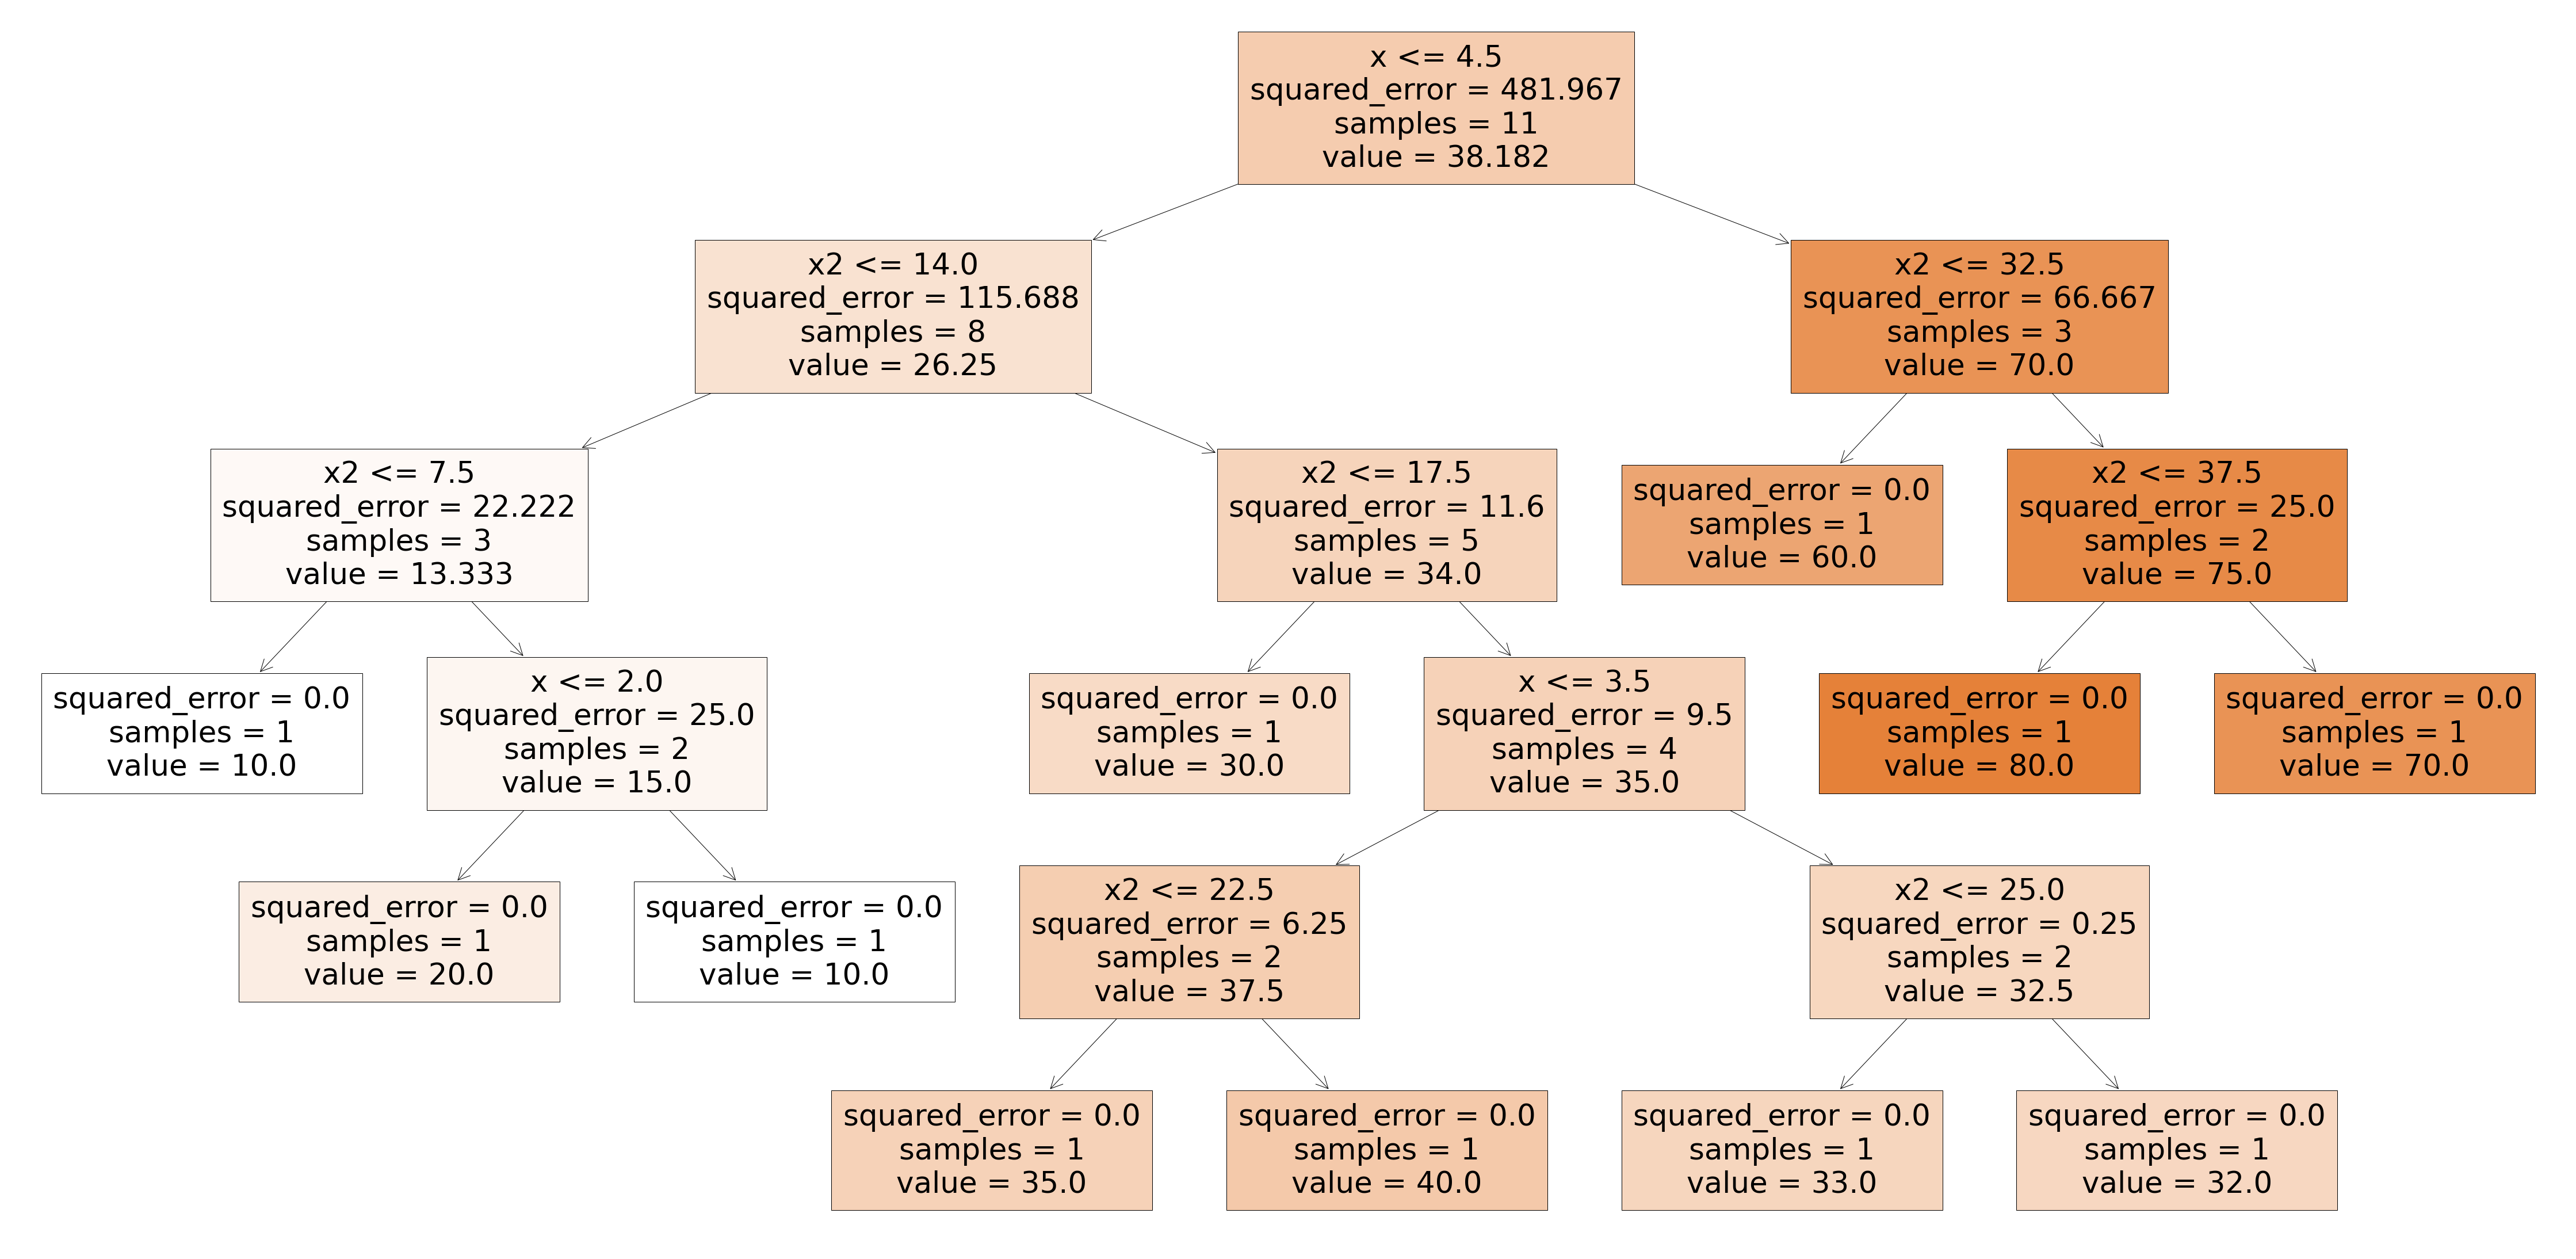

In [176]:
dec = DecisionTreeRegressor()
dec.fit(test[['x', 'x2']], test[['y']])
plt.figure(figsize=(80,40))
plot_tree(dec, feature_names = ['x', 'x2'], filled=True)

## Gradient Boosting
Pseudo Code
Step 1 - Make initial prediction as average of target
Step 2 - Calculate residual error for target variable
Step 3 - Fit tree with features and residual as target
Step 4 - Get prediction of residual x learning rate and add to initial prediction (average)
Step 5 - Compute Residual with new prediction and actual target 

In [171]:
def Gradient_Boosting(X_train, y, learning_rate= 0.001, n_trees = 10):
    # Step 1
    initial_pred = np.mean(y)
    
     # Joining X and Y for easy extraction
    data_1 = pd.concat([X_train, y], axis = 1)
    
    # Step 2
    data_1['error_init'] = y-initial_pred
    
    for iterations in range(n_trees):
        print('Fitting Tree {} ==============='.format(iterations))
        # Step 3
        temp_x = data_1.drop(['y', 'error_init'], axis= 1)
        temp_y = data_1[['error_init']]
        #print(temp_x)
        initial_feat, initial_thres, left_node_prediction, right_node_prediction = decision_tree(temp_x, temp_y)
        #print(initial_feat, initial_thres, left_node_prediction, right_node_prediction)
        # Joining X and Y for easy extraction
        data = pd.concat([temp_x, temp_y], axis = 1)
        
        #print(initial_thres, initial_feat, feats, min_thresholds)
        
        left_new_y = data_1[data_1[initial_feat] <= initial_thres][y.columns.values[0]] + learning_rate*left_node_prediction
        right_new_y = data_1[data_1[initial_feat] > initial_thres][y.columns.values[0]] + learning_rate*right_node_prediction
        
        new_pred_y = pd.concat([left_new_y, right_new_y])
        data['pred'] = new_pred_y
        #print(data)
        data_1['error_init'] = data_1[y.columns.values[0]]-data['pred']
        print(data_1)
    

In [172]:
Gradient_Boosting(test[['x', 'x2']], test[['y']])

Fitting Tree 0 ===============
x 4.0 -16.125 26.875
   x  x2   y  error_init
0  0   5  10    0.016125
1  1  10  20    0.016125
2  2  15  30    0.016125
3  2  20  35    0.016125
4  3  25  40    0.016125
5  5  30  60   -0.026875
6  6  35  80   -0.026875
7  7  40  70   -0.026875
Fitting Tree 1 ===============
x 4.0 0.01612500000000061 -0.02687500000000161
   x  x2   y  error_init
0  0   5  10   -0.000016
1  1  10  20   -0.000016
2  2  15  30   -0.000016
3  2  20  35   -0.000016
4  3  25  40   -0.000016
5  5  30  60    0.000027
6  6  35  80    0.000027
7  7  40  70    0.000027
Fitting Tree 2 ===============
x 4.0 -1.6125000000144496e-05 2.687500000320142e-05
   x  x2   y    error_init
0  0   5  10  1.612500e-08
1  1  10  20  1.612500e-08
2  2  15  30  1.612500e-08
3  2  20  35  1.612500e-08
4  3  25  40  1.612500e-08
5  5  30  60 -2.687500e-08
6  6  35  80 -2.687500e-08
7  7  40  70 -2.687500e-08
Fitting Tree 3 ===============
x 4.0 1.6125000001920853e-08 -2.687500000320142e-08
   x  x2   